## Informe de Calidad de Datos

*20 de Junio de 2022.*

En este notebook dedicaremos a realizar una evaluación de la calidad de los datos para tomar acciones correctivas que nos permitan realizar un proceso de Data-Driven con datos correctos y concretos.

+ Objetivos:
    - Verificar si existen fallas en la ingesta de los datos.
    - Si existen tales fallas, realizar un trazado de los datos que nos permita seguir hasta el origen de estas fallas en el esquema de ingestión de datos de la empresa.
    - Realizar un seguimiento a fenómenos anormales que se puedan presentar en el proceso de trabajo normal de la empresa.

Nos encontramos con 7 archivos de diferentes fuentes de la empresa.

- Ventas.
- Clientes.
- Compras.
- Gasto.
- Localidades.
- Proveedores.
- Sucursales.

En base a estos datos, evaluaremos sus datos de acuerdo a las siguientes observaciones:

- Numero de datos faltantes.
- Proporcionalidad de los datos faltantes.
- Valores anormales u outliers.
- Conclusiones acerca de la calidad de la fuente.

In [71]:
# Importación de librerias
import pandas as pd
import helpers as hlp 

## Calidad de los valores en Ventas

In [72]:
df_ventas = pd.read_csv('./data-input/Venta.csv')
df_ventas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46645 entries, 0 to 46644
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   IdVenta        46645 non-null  int64  
 1   Fecha          46645 non-null  object 
 2   Fecha_Entrega  46645 non-null  object 
 3   IdCanal        46645 non-null  int64  
 4   IdCliente      46645 non-null  int64  
 5   IdSucursal     46645 non-null  int64  
 6   IdEmpleado     46645 non-null  int64  
 7   IdProducto     46645 non-null  int64  
 8   Precio         45721 non-null  float64
 9   Cantidad       45753 non-null  float64
dtypes: float64(2), int64(6), object(2)
memory usage: 3.6+ MB


Primero obtendremos un gráfico de los valores nulos respecto de los validos

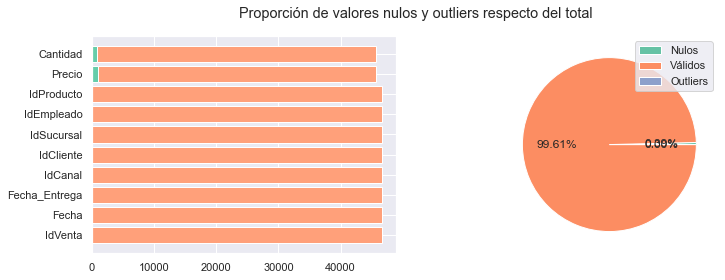

In [73]:
hlp.VisualEvaluation(df_ventas)

**Observación:** 
- Como podemos ver, la proporción de valores nulos es mínima, así que el descartarlos podría causar un impacto mínimo en la evaluación de los datos, en este caso, sería lo mas viable, ya que una imputación de estos valores, con una medía de datos, podría desequilibrar otros análisis y mas si existen sesgos demasiado pronunciados.

### Evalución de Precio

#### Evaluación con el metodo Sigma:

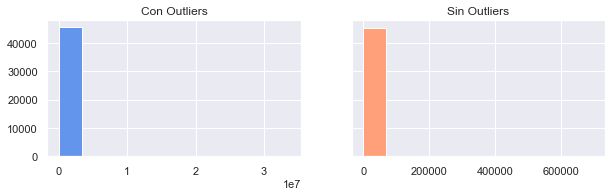

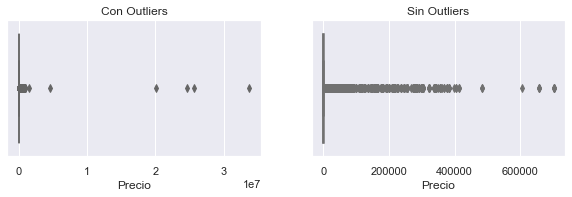

755240.4383416378


In [74]:
# Obtencion de los valores con y sin outliers
df_sigma, sigma_outliers, minlim, maxlim = hlp.SigmaOutliers(df_ventas, 'Precio')
# Visualización de los valores con y sin outliers
hlp.OutliersVisualizer(df_ventas, 'Precio', 'sigma')
# Valores maximos para la detección de outliers
print(maxlim)

**Observaciónes:**
- La gráfica muestra 1e7, valores por encima de los 7 dígitos.

- como se puede ver, los datos tienen un sesgo bastante positivo, de hecho los valores en la gráfica sin outliers alcanzan hasta los 7 digitos, mostrando valores ampliamente irregulares, ya no de casos extraordinarios de una operación (al ser de venta), sino de un error humano en la introducción de los datos.

- El método Sigma no podría ser una opción adecuada, pues su rango de datos es tan alto y los datos tan sesgados que aun quedan valores irregulares dentro del rango de datos limpios.

#### Evaluación con método IQR:

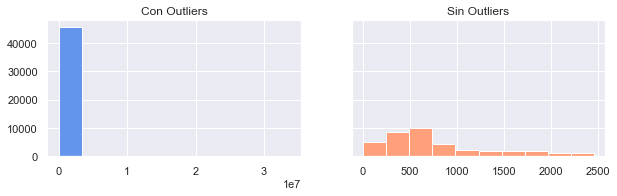

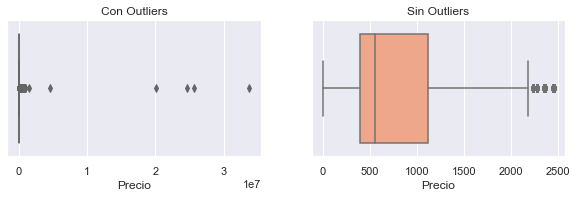

Maximo rango de valores: 2464.5
Total de valores outliers: 7893


In [75]:
# Obtencion de los valores con y sin outliers
df_iqr, iqr_outliers, minlim, maxlim = hlp.IQROutliers(df_ventas, 'Precio')
# Visualización de los valores con y sin outliers
hlp.OutliersVisualizer(df_ventas, 'Precio', 'iqr')
#
print(f'Maximo rango de valores: {maxlim}')
print(f'Total de valores outliers: {iqr_outliers.shape[0]}')


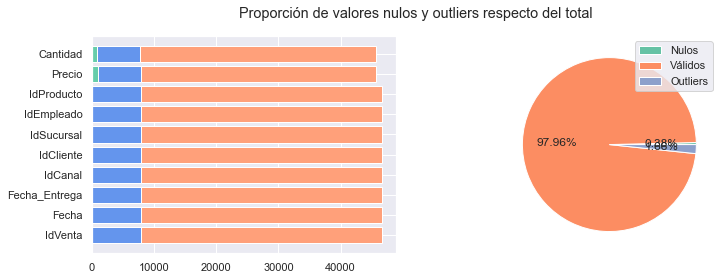

In [76]:
hlp.VisualEvaluation(df_ventas, iqr_outliers)

**Observaciones:**
- El método IQR nos permite obtener datos mas limpios, en este caso, nos deja evaluar mas claramente donde se encuentra el centro de los datos.

- Los otliers representan el 2.2% de los datos totales, su impacto de descarte de valores es mínimo.

- Es el método adecuado para evaluar los precios.

### Evaluación de Cantidad

- Evalución método Sigma:

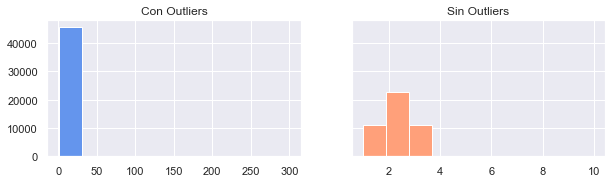

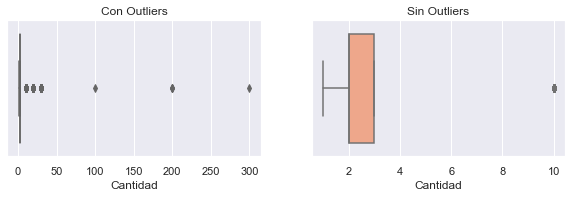

Máximo valor del rango: 13.029369958397757
Cantidad de Outliers: 698


In [77]:
# Obtencion de los valores con y sin outliers
df_sigma, sigma_outliers, minlim, maxlim = hlp.SigmaOutliers(df_ventas, 'Cantidad')
# Visualización de los valores con y sin outliers
hlp.OutliersVisualizer(df_ventas, 'Cantidad', 'sigma')
# Valors máximo del rango
print(f'Máximo valor del rango: {maxlim}')
print(f'Cantidad de Outliers: {sigma_outliers.shape[0]}')

**Observaciones:**
- Evidentemente existen valores desproporcionados que llegan hasta la cifra de 300.
- Los valores Sigma se acercan al centro de los datos razonables en Cantidades de un negocio.
- Aunque existen valores atípicos, estos deben ser tenidos en cuenta en un análisis completo, pues estos pueden representar transacciones extraordinarias que merecen evaluación mas exaustiva.

- Evaluación con el método IQR:

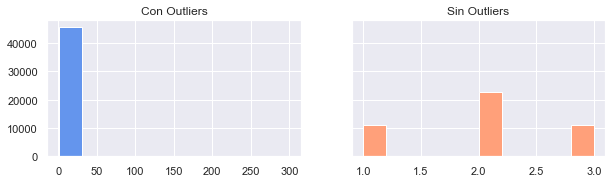

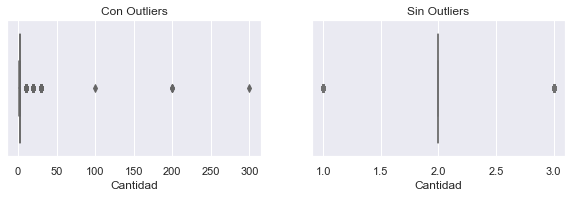

Máximo valor del rango: 3.5
Cantidad de Outliers: 913


In [78]:
df_iqr, iqr_outliers, minlim, maxlim = hlp.IQROutliers(df_ventas, 'Cantidad')
# Visualizar la proporción de valores
hlp.OutliersVisualizer(df_ventas, 'Cantidad', 'iqr')
# Valors máximo del rango
print(f'Máximo valor del rango: {maxlim}')
print(f'Cantidad de Outliers: {iqr_outliers.shape[0]}')

**Observaciones:**
- El Método IQR logra llegar al centro de los datos, pero descarta valores perfectamente posibles en una transacción que represente una cantidad.

- Aunque su impacto en el dataset es menos del 1%, vale la pena evaluar una tendencia de Cantidades con valores superiores a 3.

- El método ideal para evaluar ouliers en las cantidades es el Sigma.

### Calidad de Valores en Compras

In [91]:
df_compras = pd.read_csv('./data-input/Compra.csv')
df_compras.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11539 entries, 0 to 11538
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   IdCompra       11539 non-null  int64  
 1   Fecha          11539 non-null  object 
 2   Fecha_Año      11539 non-null  int64  
 3   Fecha_Mes      11539 non-null  int64  
 4   Fecha_Periodo  11539 non-null  int64  
 5   IdProducto     11539 non-null  int64  
 6   Cantidad       11539 non-null  int64  
 7   Precio         11172 non-null  float64
 8   IdProveedor    11539 non-null  int64  
dtypes: float64(1), int64(7), object(1)
memory usage: 811.5+ KB


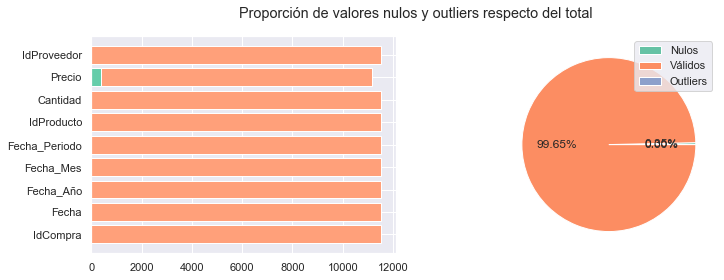

In [93]:
hlp.VisualEvaluation(df_compras)

**Observaciones:**
- Podemos ver que los datos nulos no alcanzan ni el 1%, por tanto son perfectamente descartables

### Evaluación del Precio

Siguiendo con los métodos de evaluación anteriores:

- Evaluacion de Precio con IQR:

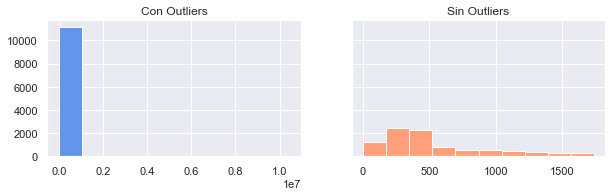

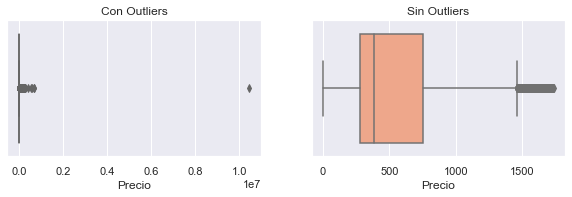

Máximo valor del rango: 1737.06875
Cantidad de Outliers: 1916


In [97]:
# Obtencion de los valores con y sin outliers
df_iqr, iqr_outliers, minlim, maxlim = hlp.IQROutliers(df_compras, 'Precio')
# Visualización de los valores con y sin outliers
hlp.OutliersVisualizer(df_compras, 'Precio', 'iqr')
# Valors máximo del rango
print(f'Máximo valor del rango: {maxlim}')
print(f'Cantidad de Outliers: {iqr_outliers.shape[0]}')

**Observaciones:**

- Se siguen notando errores de entrada cuando la grafica muestra 1e7, que nos indica que existen valores por encima de los 7 dígitos.

- Al aplicar IQR, su impacto es mínimo, representa menos del 2% y muestra la tendencia de entre mas alto el precio menos registros existen de el, mas atípicos son los valores por encima del IQR, a la vez que descarta estos valores irregulares en 7 dígitos

#### Analisis Cantidad

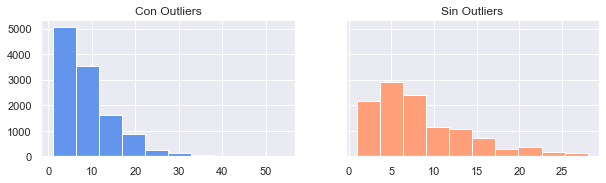

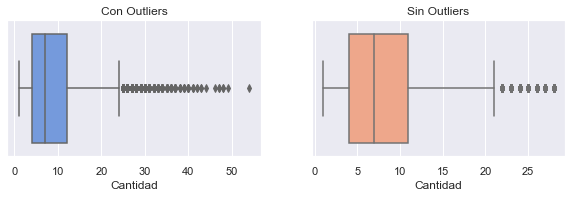

Máximo valor del rango: 28.062636385301502


In [98]:
# Obtencion de los valores con y sin outliers
df_sigma, sigma_outliers, minlim, maxlim = hlp.SigmaOutliers(df_compras, 'Cantidad')
# Visualización de los valores con y sin outliers
hlp.OutliersVisualizer(df_compras, 'Cantidad', 'sigma')
# Valors máximo del rango
print(f'Máximo valor del rango: {maxlim}')

**Observaciones:**
- Podemos observar en el boxplot que existen valores realmente altos, pero pueden ir acordes a unas ventas extraordinarias,
 sin embargo siguen existiendo valores moy atipicos.

- Al aplicar el método sigma, tenemos un acercamiento mas al centro de datos, sin embargo, esta medida debería usarse para tendencias, porque los outliers detectados pueden pertenecer perfectamente a un hecho de ventas real de la empresa, así que no se puede descartar en los balances.

### Calidad de datos de Clientes

In [82]:
df_clientes = pd.read_csv('./data-input/Clientes.csv', delimiter=';')
df_clientes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2672 entries, 0 to 2671
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   ID                 2672 non-null   int64  
 1   Provincia          2647 non-null   object 
 2   Nombre_y_Apellido  2648 non-null   object 
 3   Domicilio          2630 non-null   object 
 4   Telefono           2637 non-null   object 
 5   Edad               2672 non-null   int64  
 6   Localidad          2647 non-null   object 
 7   X                  2616 non-null   object 
 8   Y                  2618 non-null   object 
 9   col10              0 non-null      float64
dtypes: float64(1), int64(2), object(7)
memory usage: 208.9+ KB


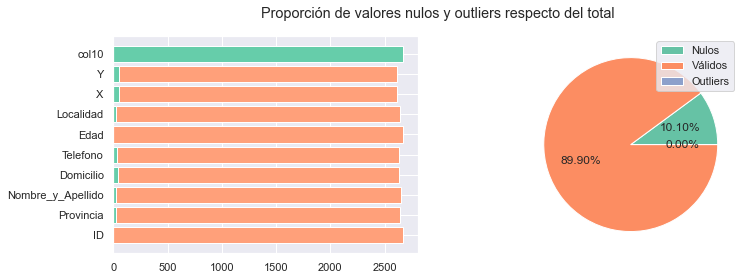

In [83]:
# Visualizar la proporción de valores
hlp.VisualEvaluation(df_clientes)


In [84]:
# conteo de valores nulos
count_missing = df_clientes.isna().sum().sum()
count_missing

2933

Borrando la columna col10 que no tiene ningun valor los valores se distribuyen así:

In [85]:
df_clientes.drop('col10', axis=1, inplace=True)

In [86]:
# conteo de valores nulos
count_missing = df_clientes.isna().sum().sum()
count_missing

261

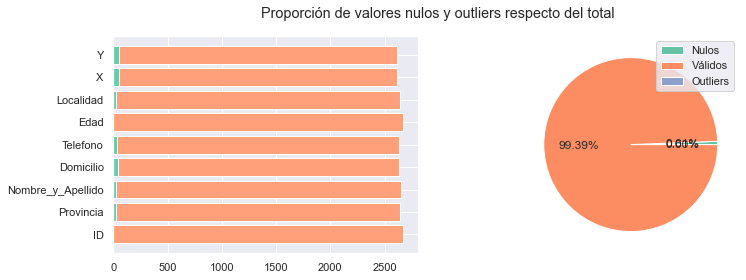

In [87]:
hlp.VisualEvaluation(df_clientes)

**Observaciones:**
- Totalmente necesario borrar la columna de 'col10', pues esta no tiene ningun tipo de valor.
- El impacto de los datos nulos es mínimo, menos del 1%, sin embargo, lo ideal sería imputarlos, pues al descartarlos estamos desechando información de un cliente, que puede resultar o valiosa, o informativa para la interacción con futuros clietes.

### Calidad de los Datos en Gastos

In [88]:
df_gastos = pd.read_csv('./data-input/Gasto.csv')
df_gastos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8640 entries, 0 to 8639
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   IdGasto      8640 non-null   int64  
 1   IdSucursal   8640 non-null   int64  
 2   IdTipoGasto  8640 non-null   int64  
 3   Fecha        8640 non-null   object 
 4   Monto        8640 non-null   float64
dtypes: float64(1), int64(3), object(1)
memory usage: 337.6+ KB


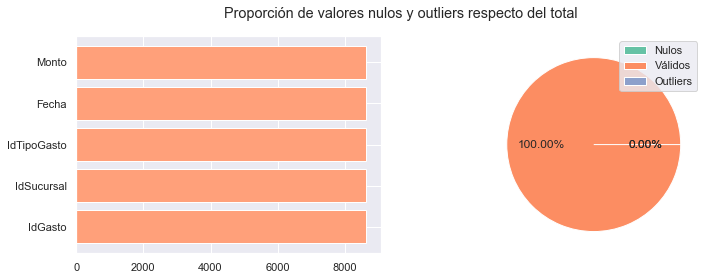

In [99]:
hlp.VisualEvaluation(df_gastos)

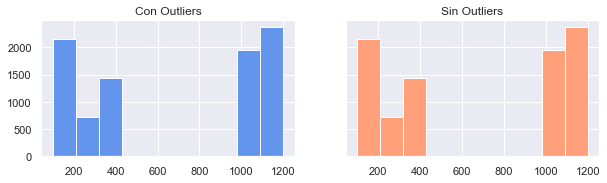

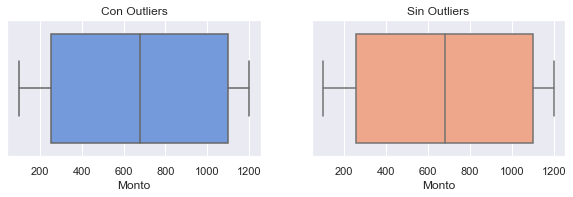

28.062636385301502

In [101]:
hlp.OutliersVisualizer(df_gastos, 'Monto')

maxlim

**Observaciones:**

- Todos los datos de Gastos se encuentran dentro de los rangos lógicos (numericamente hablando) y en completitud

### Calidad de Datos Localidades

In [102]:
df_localidades = pd.read_csv('./data-input/Localidades.csv')
df_localidades.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4142 entries, 0 to 4141
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   categoria                4142 non-null   object 
 1   centroide_lat            4142 non-null   float64
 2   centroide_lon            4142 non-null   float64
 3   departamento_id          4141 non-null   float64
 4   departamento_nombre      4141 non-null   object 
 5   fuente                   4142 non-null   object 
 6   id                       4142 non-null   int64  
 7   localidad_censal_id      4142 non-null   int64  
 8   localidad_censal_nombre  4142 non-null   object 
 9   municipio_id             3599 non-null   float64
 10  municipio_nombre         3648 non-null   object 
 11  nombre                   4142 non-null   object 
 12  provincia_id             4142 non-null   int64  
 13  provincia_nombre         4142 non-null   object 
dtypes: float64(4), int64(3),

In [103]:
count_missing = df_localidades.isna().sum()
count_missing

categoria                    0
centroide_lat                0
centroide_lon                0
departamento_id              1
departamento_nombre          1
fuente                       0
id                           0
localidad_censal_id          0
localidad_censal_nombre      0
municipio_id               543
municipio_nombre           494
nombre                       0
provincia_id                 0
provincia_nombre             0
dtype: int64

In [ ]:
# Total de valores nulos
count_missing = df_localidades.isna().sum().values
sum(count_missing)

1039

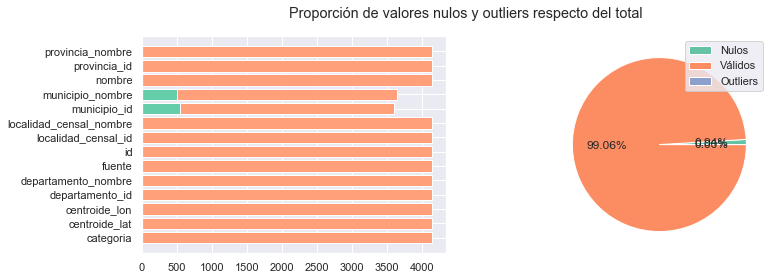

In [ ]:
hlp.VisualEvaluation(df_localidades)

**Observaciones:**

- Nuevamente hablando, los datos nulos representan un impacto minimo, sin embargo, deberia considerarse una imputación y una comparativa con datos reales al tratarse de información real y verificable.

- Tambíen podría considerarse eliminar estas columnas que contienen los datos nulos, pues habría que evaluar si estos id's realmente tienen una importancia en la evaluación que deseamos realizar de los datos.

- Eliminar columnas con nombres repetidos o información redundante.

### Calidad de Datos Proveedores

In [104]:
df_proveedores = pd.read_csv('./data-input/Proveedores.csv', encoding='latin-1')
df_proveedores.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14 entries, 0 to 13
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   IDProveedor  14 non-null     int64 
 1   Nombre       12 non-null     object
 2   Address      14 non-null     object
 3   City         14 non-null     object
 4   State        14 non-null     object
 5   Country      14 non-null     object
 6   departamen   14 non-null     object
dtypes: int64(1), object(6)
memory usage: 912.0+ bytes


In [105]:
count_missing = df_proveedores.isna().sum().values
sum(count_missing)

2

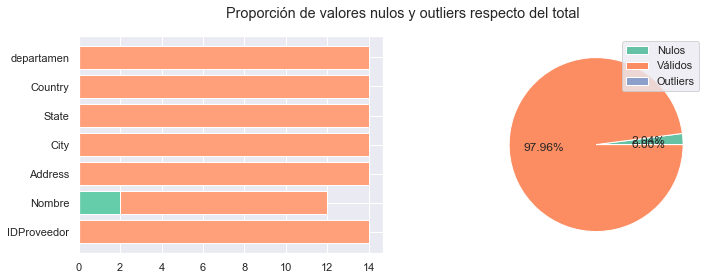

In [106]:
hlp.VisualEvaluation(df_proveedores)

**Observaciones:**

- Solo existen dos valore vacios, podría considerarse recuperar esta información que puede obtenerse perfectamente de la fuente y quienes manipulan estos datos.

### Calidad de Datos Sucursales

In [107]:
df_sucursales = pd.read_csv('./data-input/Sucursales.csv', delimiter=';')
df_sucursales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   ID         31 non-null     int64 
 1   Sucursal   31 non-null     object
 2   Direccion  31 non-null     object
 3   Localidad  31 non-null     object
 4   Provincia  31 non-null     object
 5   Latitud    31 non-null     object
 6   Longitud   31 non-null     object
dtypes: int64(1), object(6)
memory usage: 1.8+ KB


In [ ]:
count_missing = df_sucursales.isna().sum().values
sum(count_missing)

0

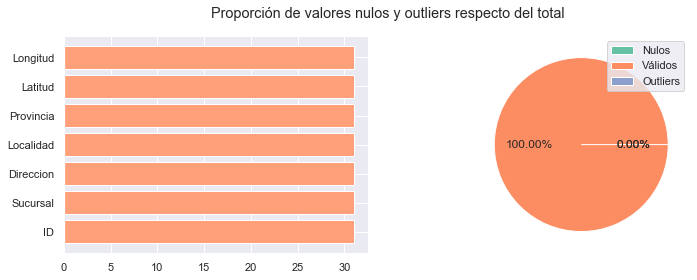

In [ ]:
hlp.VisualEvaluation(df_sucursales)

**Observaciones:**
- Los datos de sucursales se encuentran en completitud.
- Se considera realizar una normalización de tales datos al fin de eliminar información redundante